In [1]:
# check raw images


In [1]:
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import h5py

In [3]:
# save as h5py
#ind=range(4713,6184),)
# 1471 images

#0-9, white
#last10: dark
proj = dxchange.reader.read_tiff_stack(fname='/home/s1c/krause_jul19/tomo/s1400poly1_tomo/s1400poly1_tomo_004713.tif',
                                       ind=range(4713,6184))
import h5py
hf = h5py.File('s1400poly1_tomo.h5', 'w')
hf.create_dataset('data', data=proj)
hf.close()
del proj

In [8]:
del proj

(570, 2048)


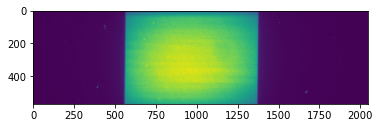

In [2]:
h5 = h5py.File('s1400poly1_tomo.h5','r')
data = h5['/data'][0,910:1480,:]
print(data.shape)
plt.imshow(data)

In [73]:
theta = tomopy.angles(projNew.shape[0])*2
print(theta,theta.shape)

[0.00000000e+00 4.36635532e-03 8.73271064e-03 ... 6.27445260e+00
 6.27881895e+00 6.28318531e+00] (1440,)


In [35]:
# save as h5py
#ind=range(4713,6184),)
# 1471 images

#0-9, white
#last10: dark
proj = dxchange.reader.read_tiff_stack(fname='/home/s1c/krause_jul19/tomo/s1400poly2_tomo/s1400poly2_tomo_004713.tif',
                                       ind=range(78186,79656))
import h5py
hf = h5py.File('s1400poly2_tomo.h5', 'w')
hf.create_dataset('data', data=proj)
hf.close()
del proj

(10, 2048)
[0.00000000e+00 4.36939173e-03 8.73878346e-03 ... 6.27444652e+00
 6.27881592e+00 6.28318531e+00] (1439,)
966.796875
Reconstructing 8 slice groups with 8 master threads...


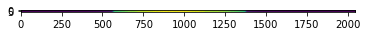

In [15]:
# find center
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import h5py
rot_center = 966.796875
layerStart= 1200#910 #1200 #910  # 1200
layerEnd= 1210 #1480 #1210   #1480 # 1250
h5 = h5py.File('s1400poly2_tomo.h5','r')
data = h5['/data'][0,layerStart:layerEnd,:]
print(data.shape)
plt.imshow(data)

white = h5['/data'][-19:-10,layerStart:layerEnd,:].astype(np.float)
projNew = h5['/data'][11:-20,layerStart:layerEnd,:].astype(np.float)
dark = h5['/data'][-10:-2,layerStart:layerEnd,:].astype(np.float)

theta = tomopy.angles(projNew.shape[0])*2
print(theta,theta.shape)
white_median = np.median(white, axis=0)
dark_median = np.median(dark, axis=0)
projNew = tomopy.normalize(projNew, white_median, dark_median)
projNew = tomopy.minus_log(projNew)

#rot_center = tomopy.find_center(projPhase, theta, init=966, ind=0, tol=0.5)
print(rot_center)

recon = tomopy.recon(projNew, theta, center=rot_center, algorithm='gridrec')
recon = tomopy.remove_ring(recon)
absorp = tomopy.retrieve_phase(recon,pixel_size=0.000148,dist=0.5,energy=71.676)

dxchange.write_tiff_stack(absorp, 'new_recon_test_1/s1400poly1_')

In [17]:
# save as h5py
#ind=range(4713,6184),)
# 1471 images

#0-9, white
#last10: dark
proj = dxchange.reader.read_tiff_stack(fname='/home/s1c/krause_jul19/tomo/s1400poly1_tomo/s1400poly1_tomo_004713.tif',
                                       ind=range(4713,6183))
import h5py
hf = h5py.File('s1400poly1_tomo.h5', 'w')
hf.create_dataset('data', data=proj)
hf.close()
del proj

(570, 2048)


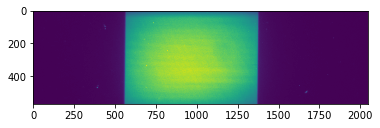

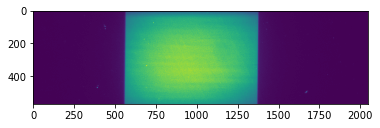

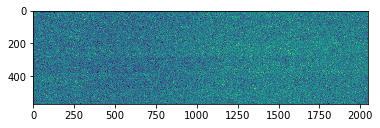

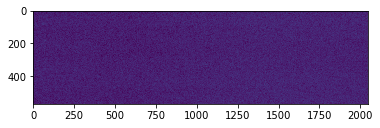

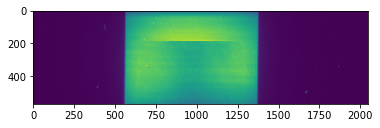

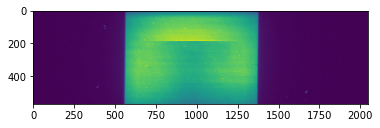

[0.00000000e+00 4.36332313e-03 8.72664626e-03 ... 6.27445866e+00
 6.27882198e+00 6.28318531e+00] (1441,)
966.796875
Reconstructing 8 slice groups with 8 master threads...


In [21]:
# find center
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import h5py
rot_center = 966.796875
layerStart= 910 #1200 #910  # 1200
layerEnd= 1480 #1210   #1480 # 1250
initial = 's1400poly1_tomo'
h5 = h5py.File(f'{initial}.h5','r')
data = h5['/data'][0,layerStart:layerEnd,:]
print(data.shape)
plt.imshow(data)

white = h5['/data'][-19:-10,layerStart:layerEnd,:].astype(np.float)
projNew = h5['/data'][10:(10+1441),layerStart:layerEnd,:].astype(np.float)
dark = h5['/data'][-9:-2,layerStart:layerEnd,:].astype(np.float)

plt.imshow(white[0,:,:])
plt.show()
plt.imshow(white[-1,:,:])
plt.show()
plt.imshow(dark[0,:,:])
plt.show()
plt.imshow(dark[-1,:,:])
plt.show()
plt.imshow(projNew[0,:,:])
plt.show()
plt.imshow(projNew[-1,:,:])
plt.show()

theta = tomopy.angles(projNew.shape[0])*2
print(theta,theta.shape)
white_median = np.median(white, axis=0)
dark_median = np.median(dark, axis=0)
projNew = tomopy.normalize(projNew, white_median, dark_median)
projNew = tomopy.minus_log(projNew)

#rot_center = tomopy.find_center(projPhase, theta, init=966, ind=0, tol=0.5)
print(rot_center)

recon = tomopy.recon(projNew, theta, center=rot_center, algorithm='gridrec')
recon = tomopy.remove_ring(recon)
absorp = tomopy.retrieve_phase(recon,pixel_size=0.000148,dist=0.5,energy=71.676)

dxchange.write_tiff_stack(absorp, f'{initial}_{layerStart}_{layerEnd}/{initial}_')

(570, 2048)


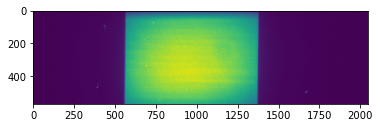

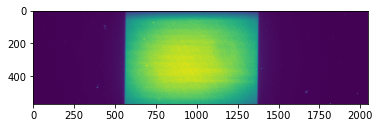

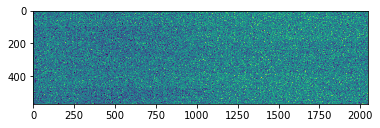

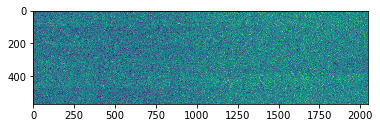

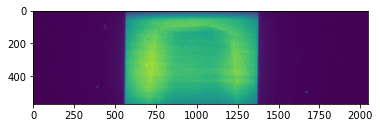

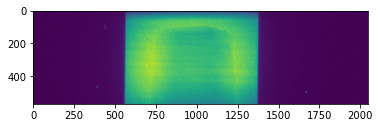

[0.00000000e+00 4.36332313e-03 8.72664626e-03 ... 6.27445866e+00
 6.27882198e+00 6.28318531e+00] (1441,)
966.796875
Reconstructing 8 slice groups with 8 master threads...


In [22]:
# find center
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import h5py
rot_center = 966.796875
layerStart= 910 #1200 #910  # 1200
layerEnd= 1480 #1210   #1480 # 1250
initial = 's1400_100_1_tomo'
startImgIdx = 152258
# save as h5py
#ind=range(4713,6184),)
# 1471 images

#0-9, white
#last10: dark
proj = dxchange.reader.read_tiff_stack(fname=f'/home/s1c/krause_jul19/tomo/{initial}/{initial}_004713.tif',
                                       ind=range(startImgIdx,startImgIdx + 1471))
import h5py
hf = h5py.File(f'{initial}.h5', 'w')
hf.create_dataset('data', data=proj)
hf.close()
del proj


h5 = h5py.File(f'{initial}.h5','r')
data = h5['/data'][0,layerStart:layerEnd,:]
print(data.shape)
plt.imshow(data)

white = h5['/data'][-19:-10,layerStart:layerEnd,:].astype(np.float)
projNew = h5['/data'][10:(10+1441),layerStart:layerEnd,:].astype(np.float)
dark = h5['/data'][-9:-2,layerStart:layerEnd,:].astype(np.float)

plt.imshow(white[0,:,:])
plt.show()
plt.imshow(white[-1,:,:])
plt.show()
plt.imshow(dark[0,:,:])
plt.show()
plt.imshow(dark[-1,:,:])
plt.show()
plt.imshow(projNew[0,:,:])
plt.show()
plt.imshow(projNew[-1,:,:])
plt.show()

theta = tomopy.angles(projNew.shape[0])*2
print(theta,theta.shape)
white_median = np.median(white, axis=0)
dark_median = np.median(dark, axis=0)
projNew = tomopy.normalize(projNew, white_median, dark_median)
projNew = tomopy.minus_log(projNew)

#rot_center = tomopy.find_center(projPhase, theta, init=966, ind=0, tol=0.5)
print(rot_center)

recon = tomopy.recon(projNew, theta, center=rot_center, algorithm='gridrec')
recon = tomopy.remove_ring(recon)
absorp = tomopy.retrieve_phase(recon,pixel_size=0.000148,dist=0.5,energy=71.676)

dxchange.write_tiff_stack(absorp, f'{initial}_part1_{layerStart}_{layerEnd}/{initial}_')

In [23]:
# find center
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import h5py
rot_center = 966.796875
layerStart= 910 #1200 #910  # 1200
layerEnd= 1480 #1210   #1480 # 1250
initial = 's1400_100_1_tomo'
startImgIdx = 152258 + 1471
# save as h5py
#ind=range(4713,6184),)
# 1471 images

#0-9, white
#last10: dark
proj = dxchange.reader.read_tiff_stack(fname=f'/home/s1c/krause_jul19/tomo/{initial}/{initial}_004713.tif',
                                       ind=range(startImgIdx,startImgIdx + 1471))
import h5py
hf = h5py.File(f'{initial}.h5', 'w')
hf.create_dataset('data', data=proj)
hf.close()
del proj


h5 = h5py.File(f'{initial}.h5','r')
data = h5['/data'][0,layerStart:layerEnd,:]
print(data.shape)
plt.imshow(data)

white = h5['/data'][-19:-10,layerStart:layerEnd,:].astype(np.float)
projNew = h5['/data'][10:(10+1441),layerStart:layerEnd,:].astype(np.float)
dark = h5['/data'][-9:-2,layerStart:layerEnd,:].astype(np.float)

plt.imshow(white[0,:,:])
plt.show()
plt.imshow(white[-1,:,:])
plt.show()
plt.imshow(dark[0,:,:])
plt.show()
plt.imshow(dark[-1,:,:])
plt.show()
plt.imshow(projNew[0,:,:])
plt.show()
plt.imshow(projNew[-1,:,:])
plt.show()

theta = tomopy.angles(projNew.shape[0])*2
print(theta,theta.shape)
white_median = np.median(white, axis=0)
dark_median = np.median(dark, axis=0)
projNew = tomopy.normalize(projNew, white_median, dark_median)
projNew = tomopy.minus_log(projNew)

#rot_center = tomopy.find_center(projPhase, theta, init=966, ind=0, tol=0.5)
print(rot_center)

recon = tomopy.recon(projNew, theta, center=rot_center, algorithm='gridrec')
recon = tomopy.remove_ring(recon)
absorp = tomopy.retrieve_phase(recon,pixel_size=0.000148,dist=0.5,energy=71.676)

dxchange.write_tiff_stack(absorp, f'{initial}_part2_{layerStart}_{layerEnd}/{initial}_')

OSError: Unable to create file (unable to truncate a file which is already open)